# Computing differential rates $\frac{dR}{dE}$ and modulation amplitudes for ANAIS.

See <a href="https://arxiv.org/pdf/1802.03174">Surrogate Models for Direct Dark Matter Detection</a> for RAPIDD specific doc.

## IMPORTS

In [1]:
import sys as sys
import os as os

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this implementation RAPIDD needs to be implemented in this way:

In [3]:
route_module = os.path.abspath('') # Route to RAPIDD_for_DM/rapidd directory
sys.path.append(route_module)

print(sys.path)

['/home/borja/anaconda3/lib/python313.zip', '/home/borja/anaconda3/lib/python3.13', '/home/borja/anaconda3/lib/python3.13/lib-dynload', '', '/home/borja/anaconda3/lib/python3.13/site-packages', '/home/borja/Documentos/GIT/TFG/RAPIDD_for_DM/rapidd']


In [4]:
from core import base_dir, reset_coefficients, isofromneuc, set_any_Ncoeff, read_halo, difrate_dER

## Building RAPIDD functions

The following functions take RAPIDD inner functions to compute both the differential rate and the modulation amplitude.

rho : DM local density<br>
target: target material ('Na' for Sodium and 'I' for iodine)<br>
basis: basis to figve the NREFT coefficients, 'All' stands for the proton/neutron basis<br>
day, month: day and month to compute the expected differential rate<br>
halo_dir: directory with the halo_functions files

In [5]:
@np.vectorize
def diffrate_mod(mass, er, rho=.33, target='Na', basis='All', day=4, month=3, halo_dir = "halo_tables/"):

    if not(os.path.exists(halo_dir+'halo_'+str(month)+'_'+str(day)+'.dat')):
        raise FileNotFoundError(f"File not found: {halo_dir+'halo_'+str(month)+'_'+str(day)+'.dat'}")
        
    read_halo(halo_dir+'halo_'+str(month)+'_'+str(day)+'.dat')

    return np.vectorize(difrate_dER)(rho, mass, er, target=target, basis=basis)

In [6]:
@np.vectorize
def modulation(mass, er, rho=.33, target='Na', basis='All', halo_dir = "halo_tables/"):

    if not(os.path.exists(halo_dir+'halo_6_1.dat')):
        raise FileNotFoundError(f"File not found: {halo_dir+'halo_6_1.dat'}")
    if not(os.path.exists(halo_dir+'halo_12_1.dat')):
        raise FileNotFoundError(f"File not found: {halo_dir+'halo_12_1.dat'}")

    read_halo(halo_dir+'halo_6_1.dat')
    a = np.vectorize(difrate_dER)(rho, mass, er, target=target, basis=basis)
    read_halo(halo_dir+'halo_12_1.dat')
    b = np.vectorize(difrate_dER)(rho, mass, er, target=target, basis=basis)
    
    return .5*(a-b)

In [7]:
@np.vectorize
def rate_av(mass, er, rho=.33, target='Ge', basis='All', output_dir = "halo_tables/"):

    if not(os.path.exists(output_dir+'halo_6_1.dat')) or not(os.path.exists(output_dir+'halo_12_1.dat')):
        print("Halo File not found!!!")
        return

    read_halo(output_dir+'halo_6_1.dat')
    a = np.vectorize(difrate_dER)(rho, mass, er, target=target, basis=basis)
    read_halo(output_dir+'halo_12_1.dat')
    b = np.vectorize(difrate_dER)(rho, mass, er, target=target, basis=basis)
    
    return .5*(a+b)

# Some Examples

Let's define a sample mass $m_\chi=50$ GeV and a range of energies in keV to compute the rates.

In [8]:
energies = np.linspace(0.01, 100, 500) # keV
m = 50 # GeV

### Operator $\mathcal{O}_1$

#### Differential Rate

This function puts all the NREFT coefficients to zero:

In [9]:
reset_coefficients()

Now we fix to "one" the coefficient of $\mathcal{O}_1$ for both protons and neutrons.

In RAPIDD convention, coefficients are chosen to be dimensionless normalized by the Higgs vacuum expectation value (see [1802.03174] for more info).

In [10]:
set_any_Ncoeff(1, 1, "p")
set_any_Ncoeff(1, 1, "n")

Now we compute the differential rate for that range of energies for both Sodium and Iodine targets

In [11]:
drde_Na_1 = diffrate_mod(m, energies, target='Na')
drde_I_1 = diffrate_mod(m, energies, target='I')

Text(0.5, 1.0, 'Operator 1, m = 50 GeV')

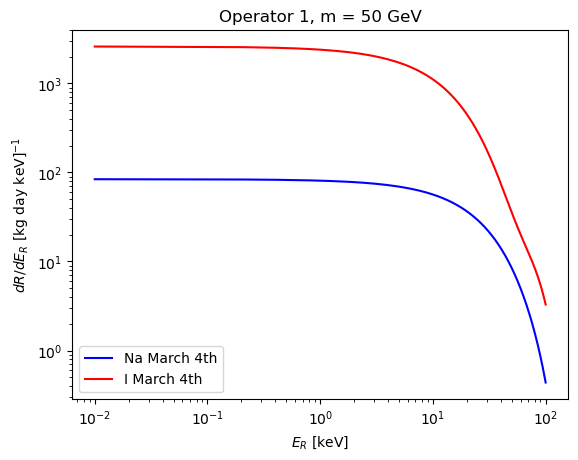

In [12]:
plt.loglog(energies, drde_Na_1, 'b', label='Na March 4th')
plt.loglog(energies, drde_I_1, 'r', label='I March 4th')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$dR/dE_R$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 1, m = {m} GeV")

Text(0.5, 1.0, 'Operator 1, mchi = 50 GeV')

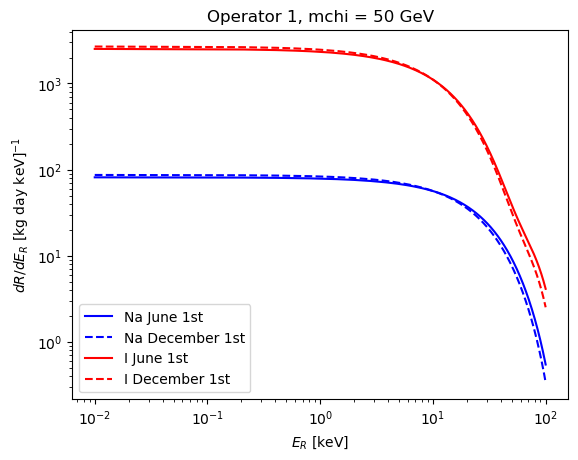

In [13]:
plt.loglog(energies, diffrate_mod(m, energies, target='Na',day=1, month=6),'b-', label='Na June 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='Na',day=1, month=12),'b--', label='Na December 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='I',day=1, month=6),'r-', label='I June 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='I',day=1, month=12),'r--', label='I December 1st')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$dR/dE_R$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 1, mchi = {m} GeV")
# plt.savefig('O1_rate.pdf')
# plt.savefig('O1_rate.svg')

#### Modulation Amplitude

Now we compute the modulation amplitude.

In [14]:
mod_Na_1 = modulation(m, energies, target='Na')
mod_I_1 = modulation(m, energies, target='I')

Text(0.5, 1.0, 'Operator 1, mchi = 50 GeV')

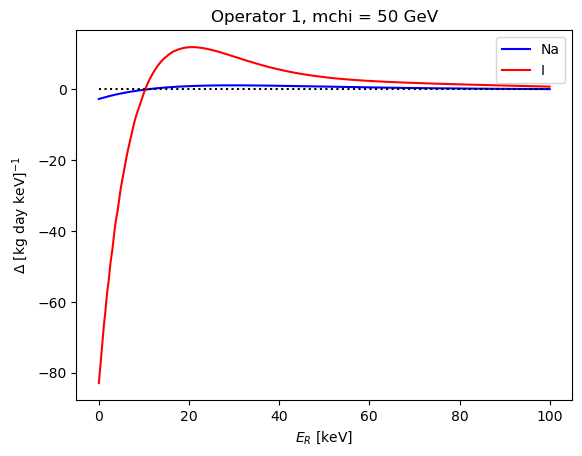

In [15]:
plt.plot(energies, mod_Na_1, 'b', label='Na')
plt.plot(energies, mod_I_1, 'r', label='I')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 1, mchi = {m} GeV")
# plt.savefig('O1_mod.pdf')
# plt.savefig('O1_mod.svg')

#### Relative Difference

Here I compute the fractional modulation per energy.

In [16]:
av_Na_1 = rate_av(m, energies, target='Na')
av_I_1 = rate_av(m, energies, target='I')

Text(0.5, 1.0, 'Operator 1, mchi = 50 GeV')

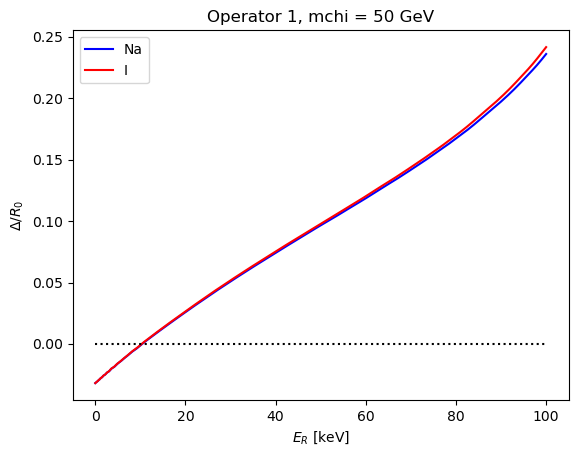

In [17]:
plt.plot(energies, mod_Na_1 / av_Na_1, 'b', label='Na')
plt.plot(energies, mod_I_1 / av_I_1, 'r', label='I')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta/R_0$")
plt.legend()
plt.title(f"Operator 1, mchi = {m} GeV")

### Operator $\mathcal{O}_8$

We do the same for operator $\mathcal{O}_8$.

In [18]:
reset_coefficients()

In [19]:
set_any_Ncoeff(1, 8, "p")
set_any_Ncoeff(1, 8, "n")

In [20]:
drde_Na_8 = diffrate_mod(m, energies, target='Na')
drde_I_8 = diffrate_mod(m, energies, target='I')

Text(0.5, 1.0, 'Operator 8, mchi = 50 GeV')

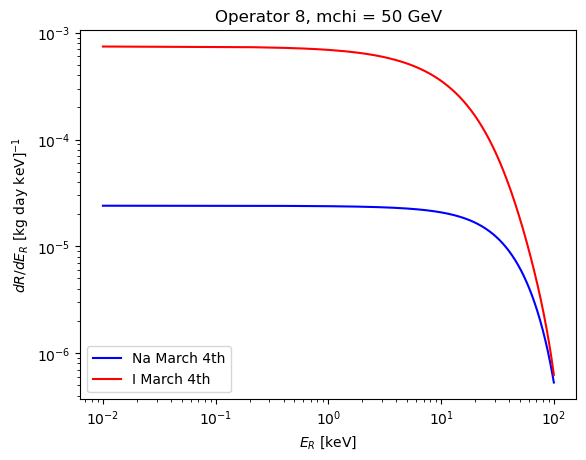

In [21]:
plt.loglog(energies, drde_Na_8, 'b', label='Na March 4th')
plt.loglog(energies, drde_I_8, 'r', label='I March 4th')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$dR/dE_R$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 8, mchi = {m} GeV")

Text(0.5, 1.0, 'Operator 8, mchi = 50 GeV')

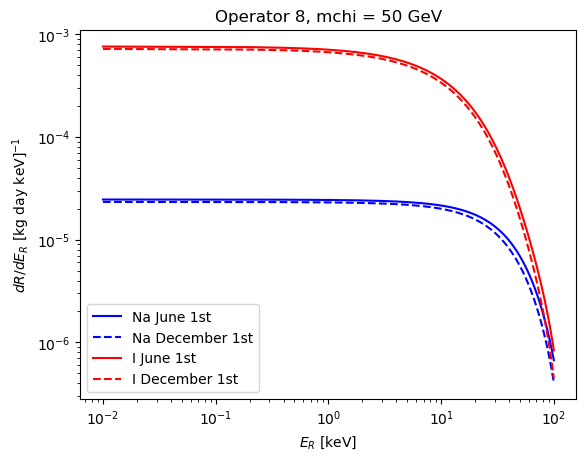

In [22]:
plt.loglog(energies, diffrate_mod(m, energies, target='Na',day=1, month=6),'b-', label='Na June 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='Na',day=1, month=12),'b--', label='Na December 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='I',day=1, month=6),'r-', label='I June 1st')
plt.loglog(energies, diffrate_mod(m, energies, target='I',day=1, month=12),'r--', label='I December 1st')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$dR/dE_R$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 8, mchi = {m} GeV")
# plt.savefig('O8_rate.pdf')
# plt.savefig('O8_rate.svg')# 

In [23]:
mod_Na_8 = modulation(m, energies, target='Na')
mod_I_8 = modulation(m, energies, target='I')

Text(0.5, 1.0, 'Operator 8, mchi = 50 GeV')

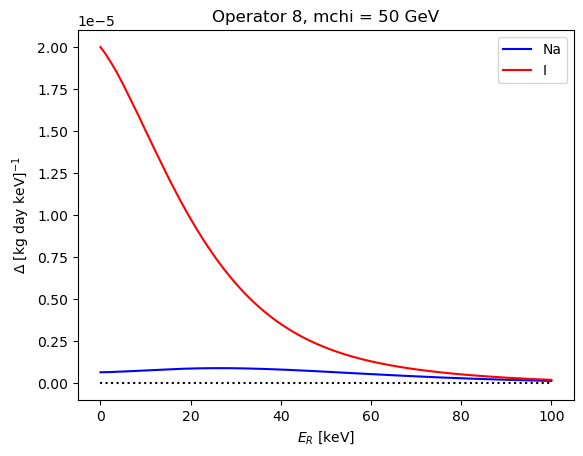

In [24]:
plt.plot(energies, mod_Na_8, 'b', label='Na')
plt.plot(energies, mod_I_8, 'r', label='I')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Operator 8, mchi = {m} GeV")
# plt.savefig('O8_mod.pdf')
# plt.savefig('O8_mod.svg')

In [25]:
av_Na_8 = rate_av(m, energies, target='Na')
av_I_8 = rate_av(m, energies, target='I')

Text(0.5, 1.0, 'Operator 8, mchi = 50 GeV')

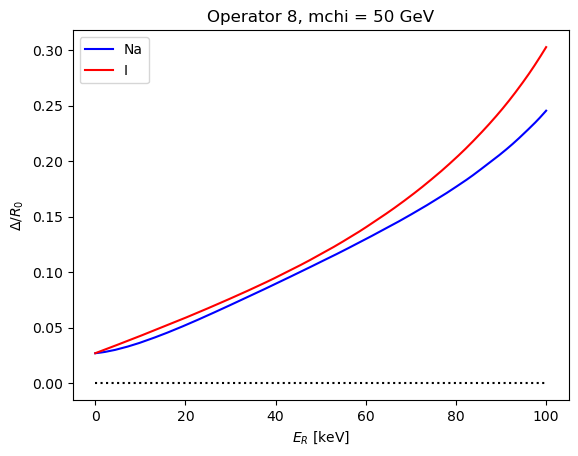

In [26]:
plt.plot(energies, mod_Na_8 / av_Na_8, 'b', label='Na')
plt.plot(energies, mod_I_8 / av_I_8, 'r', label='I')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta/R_0$")
plt.legend()
plt.title(f"Operator 8, mchi = {m} GeV")

## Comparison of modulation amplitude

Let's re-scale contributions for each operators just to see more clearly the different behaviour of modulation amplitude.

In [27]:
normNa = np.trapezoid(drde_Na_1,energies) / np.trapezoid(drde_Na_8,energies)
normI = np.trapezoid(drde_I_1,energies) / np.trapezoid(drde_I_8,energies)

Text(0.5, 1.0, 'Sodium, mchi = 50 GeV')

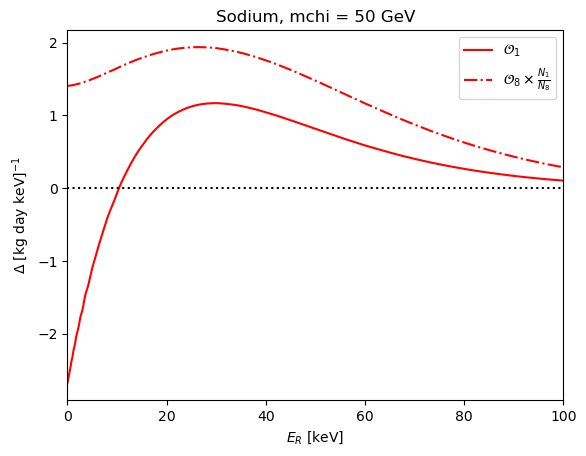

In [28]:
plt.plot(energies, mod_Na_1, 'r', label=r'$\mathcal{O}_1$')
plt.plot(energies, mod_Na_8*normNa, '-.r', label=r'$\mathcal{O}_8\times\frac{N_1}{N_8}$')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlim(0,100)

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Sodium, mchi = {m} GeV")
# plt.savefig('Na_mod.pdf')
# plt.savefig('Na_mod.svg')

Text(0.5, 1.0, 'Iodine, mchi = 50 GeV')

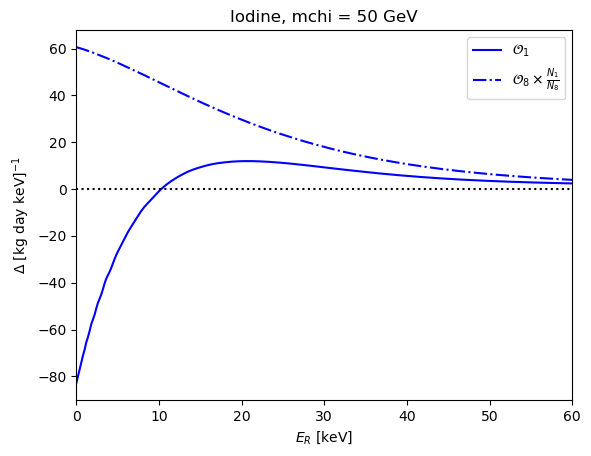

In [29]:
plt.plot(energies, mod_I_1, 'b', label=r'$\mathcal{O}_1$')
plt.plot(energies, mod_I_8*normI, '-.b', label=r'$\mathcal{O}_8\times\frac{N_1}{N_8}$')
plt.hlines(0,0,100,'k',linestyle=':')

plt.xlim(0,60)

plt.xlabel(r"$E_R$ [keV]")
plt.ylabel(r"$\Delta$ [kg day keV]$^{-1}$")
plt.legend()
plt.title(f"Iodine, mchi = {m} GeV")
# plt.savefig('I_mod.pdf')
# plt.savefig('I_mod.svg')